# SOLAR POWER GENERATION TASK

In [1]:
pwd

'C:\\Users\\admin'

# Importing libraries 

In [1]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import missingno

#Libraries for prediction
import pystan
from fbprophet import Prophet

print('Libraries are installed')

Libraries are installed


# Importing data

In [2]:
generation1 = pd.read_csv(r'C:\Users\admin\Desktop\ei-link TASK\Plant_1_Generation_Data.csv')
sensor1 = pd.read_csv(r'C:\Users\admin\Desktop\ei-link TASK\Plant_1_Weather_Sensor_Data.csv')
generation2 = pd.read_csv(r'C:\Users\admin\Desktop\ei-link TASK\Plant_2_Generation_Data.csv')
sensor2 = pd.read_csv(r'C:\Users\admin\Desktop\ei-link TASK\Plant_2_Weather_Sensor_Data.csv')

In [3]:
generation1.head(3)    #Generation Data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


In [4]:
sensor1.head(3) #Weather Sensor

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0


In [5]:
generation2.head(3) #Generation Data (2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09


In [6]:
sensor2.head(3)  # Weather Sensor (2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0


# General understanding of data

In [7]:
print("Solar Generation Plant 1's info")
generation1.info()
print('\n')
print("Solar Generation Plant 2's info")
generation2.info()

Solar Generation Plant 1's info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


Solar Generation Plant 2's info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 no

In [8]:
# Notice that the DATE_TIME column has object type, which should be datetime64

Plant 1:


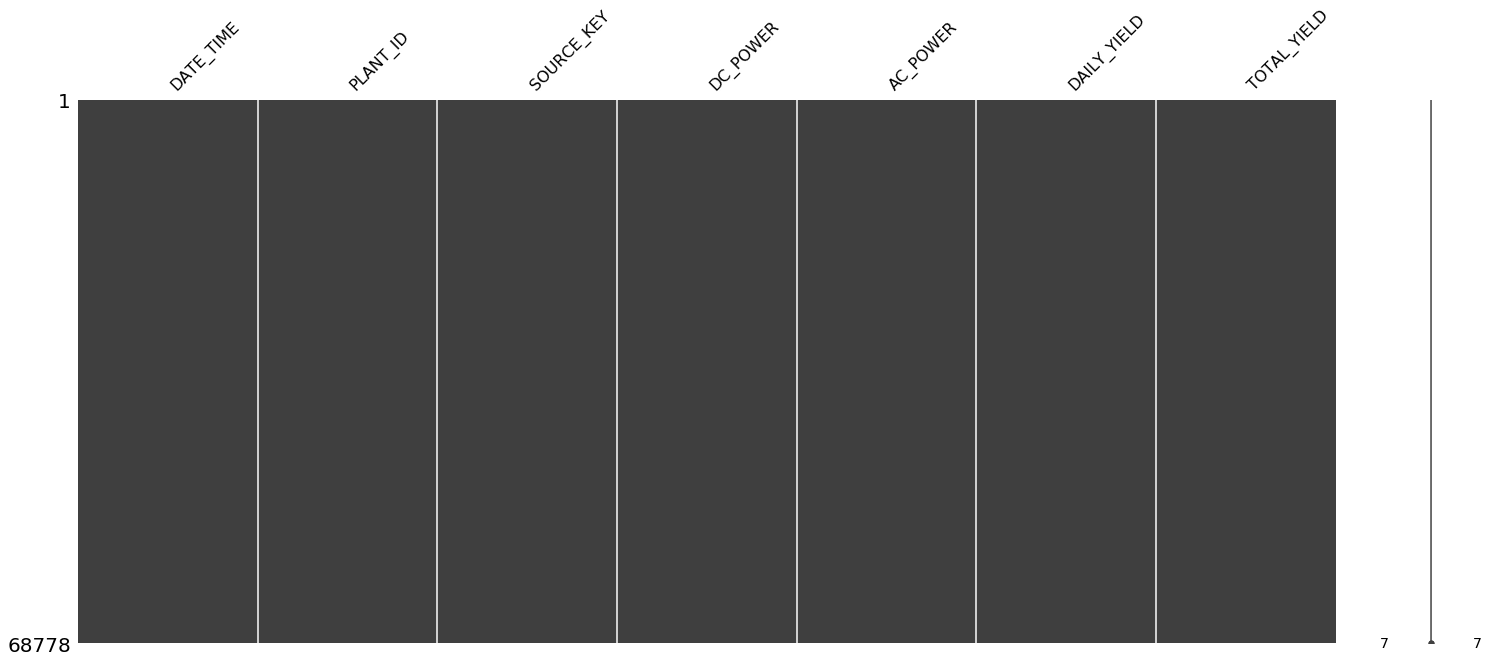

In [9]:
print('Plant 1:')       #plotting to see null values isnull().sum()
missingno.matrix(generation1)

Sensor 1:


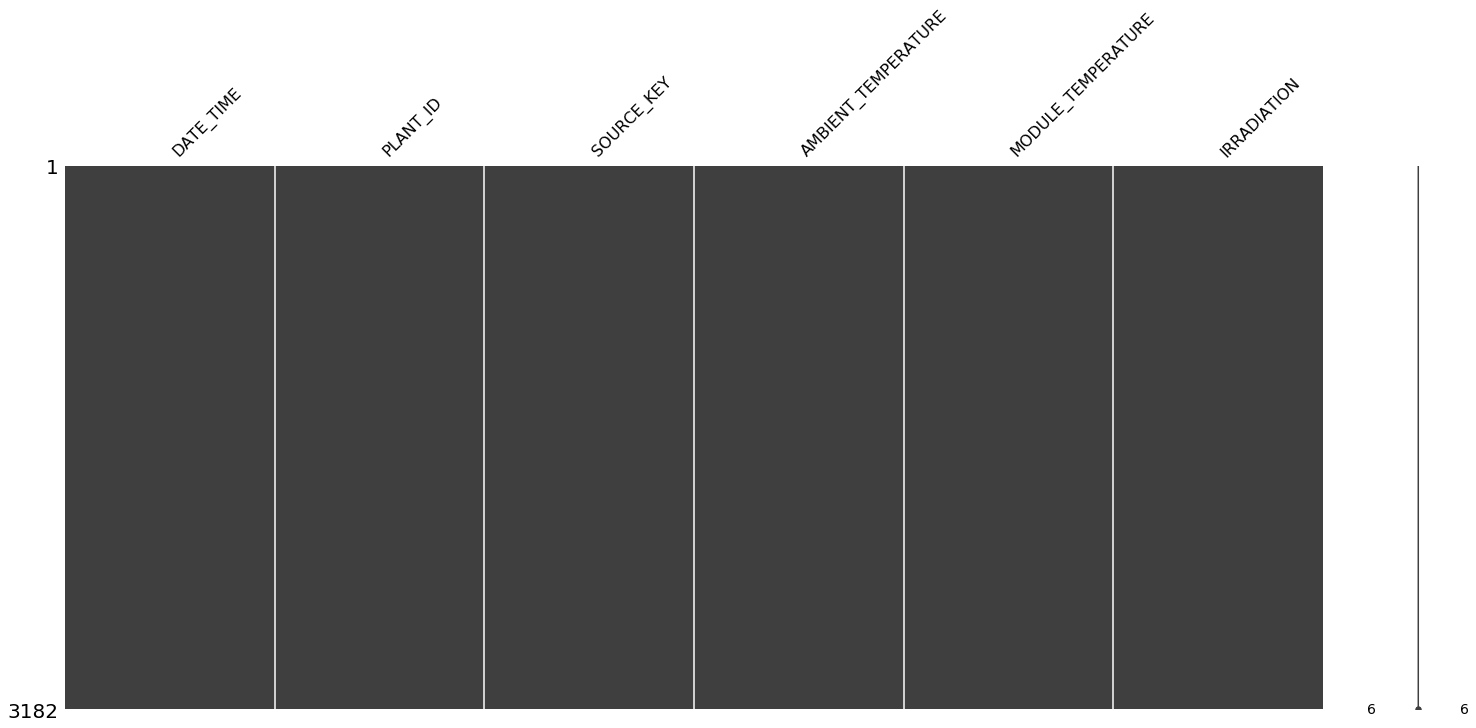

In [16]:
print('Sensor 1:')       #plotting to see null values
missingno.matrix(sensor1)

Plant 2:


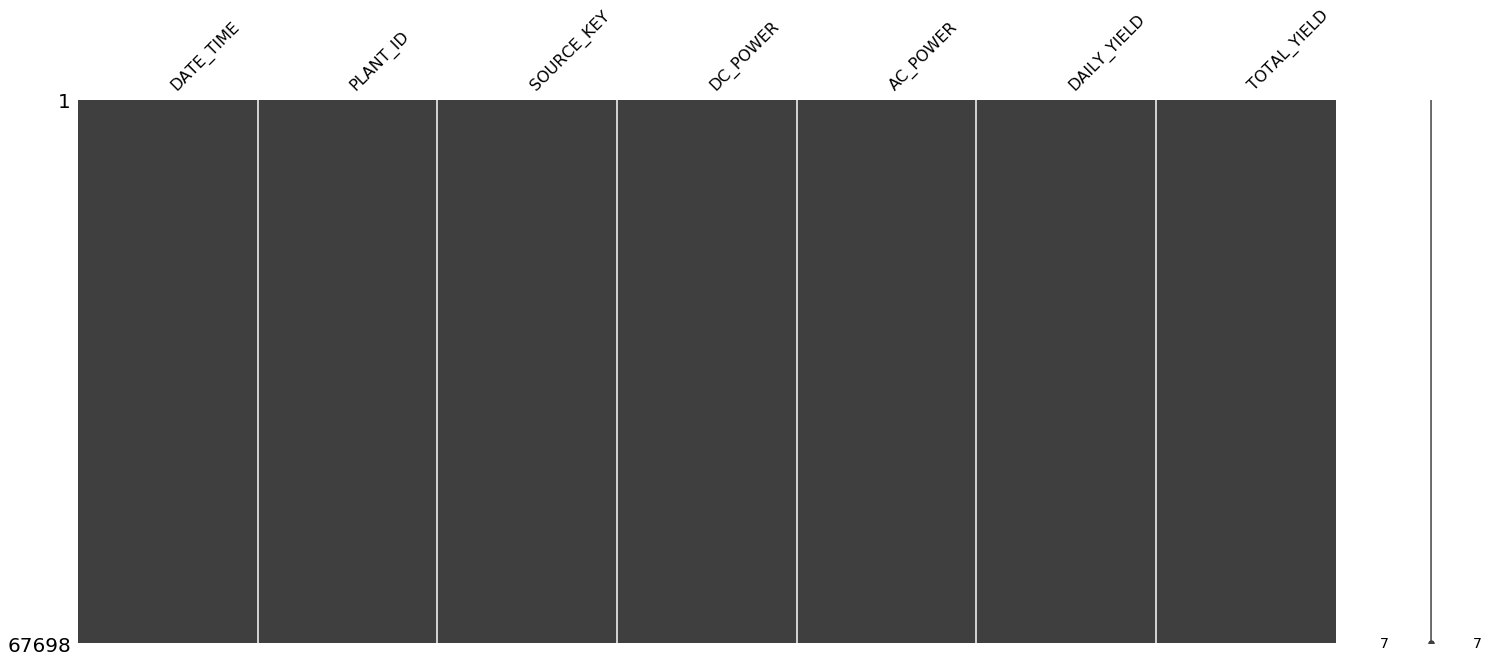

In [17]:
print('Plant 2:')       #plotting to see null values
missingno.matrix(generation2)

Sensor 2:


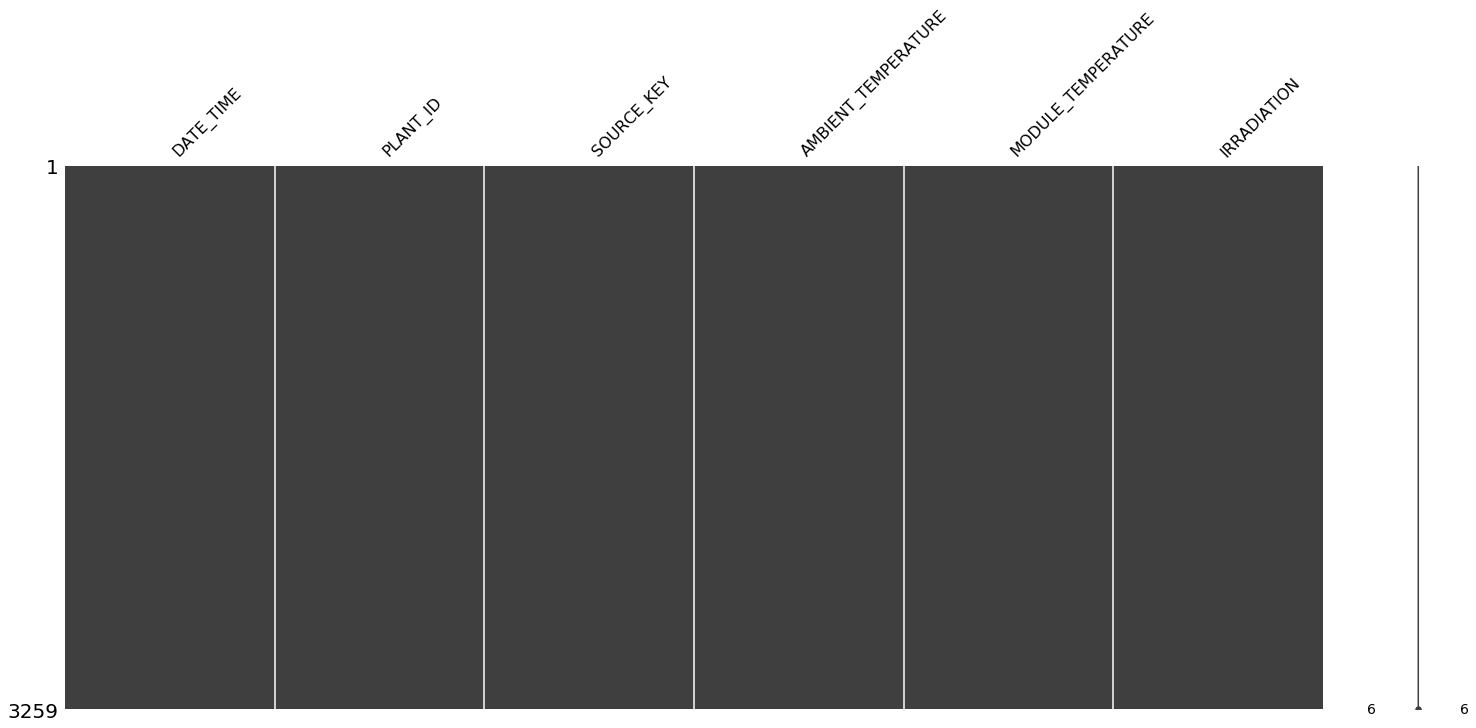

In [18]:
print('Sensor 2:')       #plotting to see null values
missingno.matrix(sensor2)

In [19]:
print('Plant 1')
generation1.groupby('SOURCE_KEY').count()

Plant 1


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
SOURCE_KEY,,,,,,
1BY6WEcLGh8j5v7,3154,3154,3154,3154,3154,3154
1IF53ai7Xc0U56Y,3119,3119,3119,3119,3119,3119
3PZuoBAID5Wc2HD,3118,3118,3118,3118,3118,3118
7JYdWkrLSPkdwr4,3133,3133,3133,3133,3133,3133
McdE0feGgRqW7Ca,3124,3124,3124,3124,3124,3124
VHMLBKoKgIrUVDU,3133,3133,3133,3133,3133,3133
WRmjgnKYAwPKWDb,3118,3118,3118,3118,3118,3118
YxYtjZvoooNbGkE,3104,3104,3104,3104,3104,3104
ZnxXDlPa8U1GXgE,3130,3130,3130,3130,3130,3130


In [20]:
print('Plant 2')
generation2.groupby('SOURCE_KEY').count()

Plant 2


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
SOURCE_KEY,,,,,,
4UPUqMRk7TRMgml,3195,3195,3195,3195,3195,3195
81aHJ1q11NBPMrL,3259,3259,3259,3259,3259,3259
9kRcWv60rDACzjR,3259,3259,3259,3259,3259,3259
Et9kgGMDl729KT4,3195,3195,3195,3195,3195,3195
IQ2d7wF4YD8zU1Q,2355,2355,2355,2355,2355,2355
LYwnQax7tkwH5Cb,3259,3259,3259,3259,3259,3259
LlT2YUhhzqhg5Sw,3259,3259,3259,3259,3259,3259
Mx2yZCDsyf6DPfv,3195,3195,3195,3195,3195,3195
NgDl19wMapZy17u,2355,2355,2355,2355,2355,2355


This data is for 34 days with 15 min frequency, this means we should have 3264(34 day x 24h x 4) for each inverter. Some rows are missing.

In [21]:
print("Sensor 1's info")
sensor1.info()
print('\n')
print("Sensor 2's info")
sensor2.info()

Sensor 1's info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


Sensor 2's info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null 

In [22]:
print('Sensor 1:')
sensor1.count()

Sensor 1:


DATE_TIME              3182
PLANT_ID               3182
SOURCE_KEY             3182
AMBIENT_TEMPERATURE    3182
MODULE_TEMPERATURE     3182
IRRADIATION            3182
dtype: int64

In [23]:
print('Sensor 2')
sensor2.count()

Sensor 2


DATE_TIME              3259
PLANT_ID               3259
SOURCE_KEY             3259
AMBIENT_TEMPERATURE    3259
MODULE_TEMPERATURE     3259
IRRADIATION            3259
dtype: int64

We also have some missing data here, should be 3264 as stated before.

# Data Cleaning

In [24]:
# Change datetime column datetime64 format


In [10]:
generation1.drop('PLANT_ID', axis=1, inplace=True)
generation2.drop('PLANT_ID', axis=1, inplace=True)

In [6]:
generation1.head(3)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


In [11]:
generation1['DATE_TIME'] = pd.to_datetime(generation1['DATE_TIME'],format ='%d-%m-%Y %H:%M')
generation2['DATE_TIME'] = pd.to_datetime(generation2['DATE_TIME'],format ='%Y-%m-%d %H:%M:%S')
generation1['DATE'] = generation1['DATE_TIME'].dt.date #adding seperate date and time columns
generation1['TIME'] = generation1['DATE_TIME'].dt.time

generation2['DATE'] = generation2['DATE_TIME'].dt.date
generation2['TIME'] = generation2['DATE_TIME'].dt.time

In [297]:
generation1.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00


In [44]:
generation2.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,00:00:00
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15,00:00:00
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,00:00:00


Some statistics before EDA:

In [55]:
a=generation1.describe()
dscrb = a.drop(['PLANT_ID'], axis=1)  #dropping ID column
dscrb

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,3147.426211,307.802752,3295.968737,6.978712e+06
std,4036.457169,394.396439,3145.178309,4.162720e+05
min,0.000000,0.000000,0.000000,6.183645e+06
25%,0.000000,0.000000,0.000000,6.512003e+06
50%,429.000000,41.493750,2658.714286,7.146685e+06
75%,6366.964286,623.618750,6274.000000,7.268706e+06
max,14471.125000,1410.950000,9163.000000,7.846821e+06


In [57]:
b=generation2.describe()
dscrb1 = b.drop(['PLANT_ID'], axis=1)  #dropping ID column
dscrb

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,246.701961,241.277825,3294.890295,6.589448e+08
std,370.569597,362.112118,2919.448386,7.296678e+08
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,272.750000,1.996494e+07
50%,0.000000,0.000000,2911.000000,2.826276e+08
75%,446.591667,438.215000,5534.000000,1.348495e+09
max,1420.933333,1385.420000,9873.000000,2.247916e+09


In [60]:
c=sensor1.describe()
dscrb2 = c.drop(['PLANT_ID'], axis=1)  #dropping ID column
dscrb

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.000000,3182.000000,3182.000000
mean,25.531606,31.091015,0.228313
std,3.354856,12.261222,0.300836
min,20.398505,18.140415,0.000000
25%,22.705182,21.090553,0.000000
50%,24.613814,24.618060,0.024653
75%,27.920532,41.307840,0.449588
max,35.252486,65.545714,1.221652


In [63]:
d=sensor2.describe()
dscrb = d.drop(['PLANT_ID'], axis=1)  #dropping ID column
dscrb

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.000000,3259.000000,3259.000000
mean,28.069400,32.772408,0.232737
std,4.061556,11.344034,0.312693
min,20.942385,20.265123,0.000000
25%,24.602135,23.716881,0.000000
50%,26.981263,27.534606,0.019040
75%,31.056757,40.480653,0.438717
max,39.181638,66.635953,1.098766


# Exploring the data and trying to answer question like:

1) What is Total irradiaton per day? (To check if there is radiation difference between plant 1 and 2)

In [66]:
irradiation_total1 = sensor1['IRRADIATION'].sum()
roundedtotal=round(irradiation_total1,2) #rounding
print(f'The total irradiation in plant 1 weather sensor data is {roundedtotal}' )

The total irradiation in plant1 weather sensor data is 726.49


In [8]:
irradiation_total2 = sensor2['IRRADIATION'].sum()
roundedtotal2=round(irradiation_total2,2) #rounding
print(f'The total irradiation in plant 2 weather sensor data is {roundedtotal2}' )

The total irradiation in plant 2 weather sensor data is 758.49


2) How many inverters are there for each plant?

In [69]:
plant1_inverter_1 = generation1['SOURCE_KEY'].nunique()
plant1_inverter_2 = sensor1['SOURCE_KEY'].nunique()
plant2_inverter_1 = generation2['SOURCE_KEY'].nunique()
plant2_inverter_2 = sensor2['SOURCE_KEY'].nunique()
print(f'The number of inverters in plant 1 generation data is {plant1_inverter_1}')
print(f'The number of inverters in plant 1 weather sensor data is {plant1_inverter_2}')
print(f'The number of inverters in plant 2 generation data is {plant2_inverter_1}')
print(f'The number of inverters in plant 2 weather sensor data is {plant2_inverter_2}')

The number of inverters in plant 1 generation data is 22
The number of inverters in plant 1 weather sensor data is 1
The number of inverters in plant 2 generation data is 22
The number of inverters in plant 2 weather sensor data is 1


3) Ranking of daily yield from inventers

In [ ]:
data = generation1
def show_ranking_of_inverter_daily_yield_mean(data, label=''):
    data = data.sort_values(['SOURCE_KEY', 'DATE_TIME', 'DAILY_YIELD']).drop_duplicates(['SOURCE_KEY', 'DATE'], keep='last')

    sources = pd.DataFrame()

    for source_key in data['SOURCE_KEY'].unique():
        daily_yield_mean = data[data['SOURCE_KEY'] == source_key]['DAILY_YIELD'].mean()
        sources = sources.append({'SOURCE_KEY':source_key, 'DAILY_YIELD_MEAN': daily_yield_mean}, ignore_index=True)
        
    print(f' {label} - Ranking of daily yield for each sources')
    print(sources.sort_values(['DAILY_YIELD_MEAN'], ascending=False).reset_index(drop=True))
    
    return sources

In [302]:
daily_yield_mean1 = show_ranking_of_inverter_daily_yield_mean(generation1, 'Plant1')
print('')
daily_yield_mean2 = show_ranking_of_inverter_daily_yield_mean(generation2, 'Plant2')

 Plant1 - Ranking of daily yield for each sources
    DAILY_YIELD_MEAN       SOURCE_KEY
0        6420.558824  1BY6WEcLGh8j5v7
1        6248.588235  VHMLBKoKgIrUVDU
2        6214.617647  ZnxXDlPa8U1GXgE
3        6100.882353  7JYdWkrLSPkdwr4
4        6052.588235  3PZuoBAID5Wc2HD
5        6019.705882  ih0vzX44oOqAx2f
6        5988.441176  iCRJl6heRkivqQ3
7        5931.617647  pkci93gMrogZuBj
8        5919.764706  YxYtjZvoooNbGkE
9        5915.040441  zVJPv84UY57bAof
10       5900.106618  1IF53ai7Xc0U56Y
11       5883.757353  WRmjgnKYAwPKWDb
12       5878.088235  ZoEaEvLYb1n2sOq
13       5877.786765  rGa61gmuvPhdLxV
14       5861.500000  z9Y9gH1T5YWrNuG
15       5859.165966  adLQvlD726eNBSB
16       5846.448529  uHbuxQJl8lW7ozc
17       5717.264706  zBIq5rxdHJRwDNY
18       4590.392857  McdE0feGgRqW7Ca
19       3833.302521  bvBOhCH3iADSZry
20       3598.731092  sjndEbLyjtCKgGv
21       3376.084559  wCURE6d3bPkepu2

 Plant2 - Ranking of daily yield for each sources
    DAILY_YIELD_MEAN     

Before coming to the visualizations, we can easily detect the underperforming inverters from descending order. 

# Visualizations

Best way to find underperforming inverter is visualizing 

(Checking Plant 1 has no point, we will see in a minute)

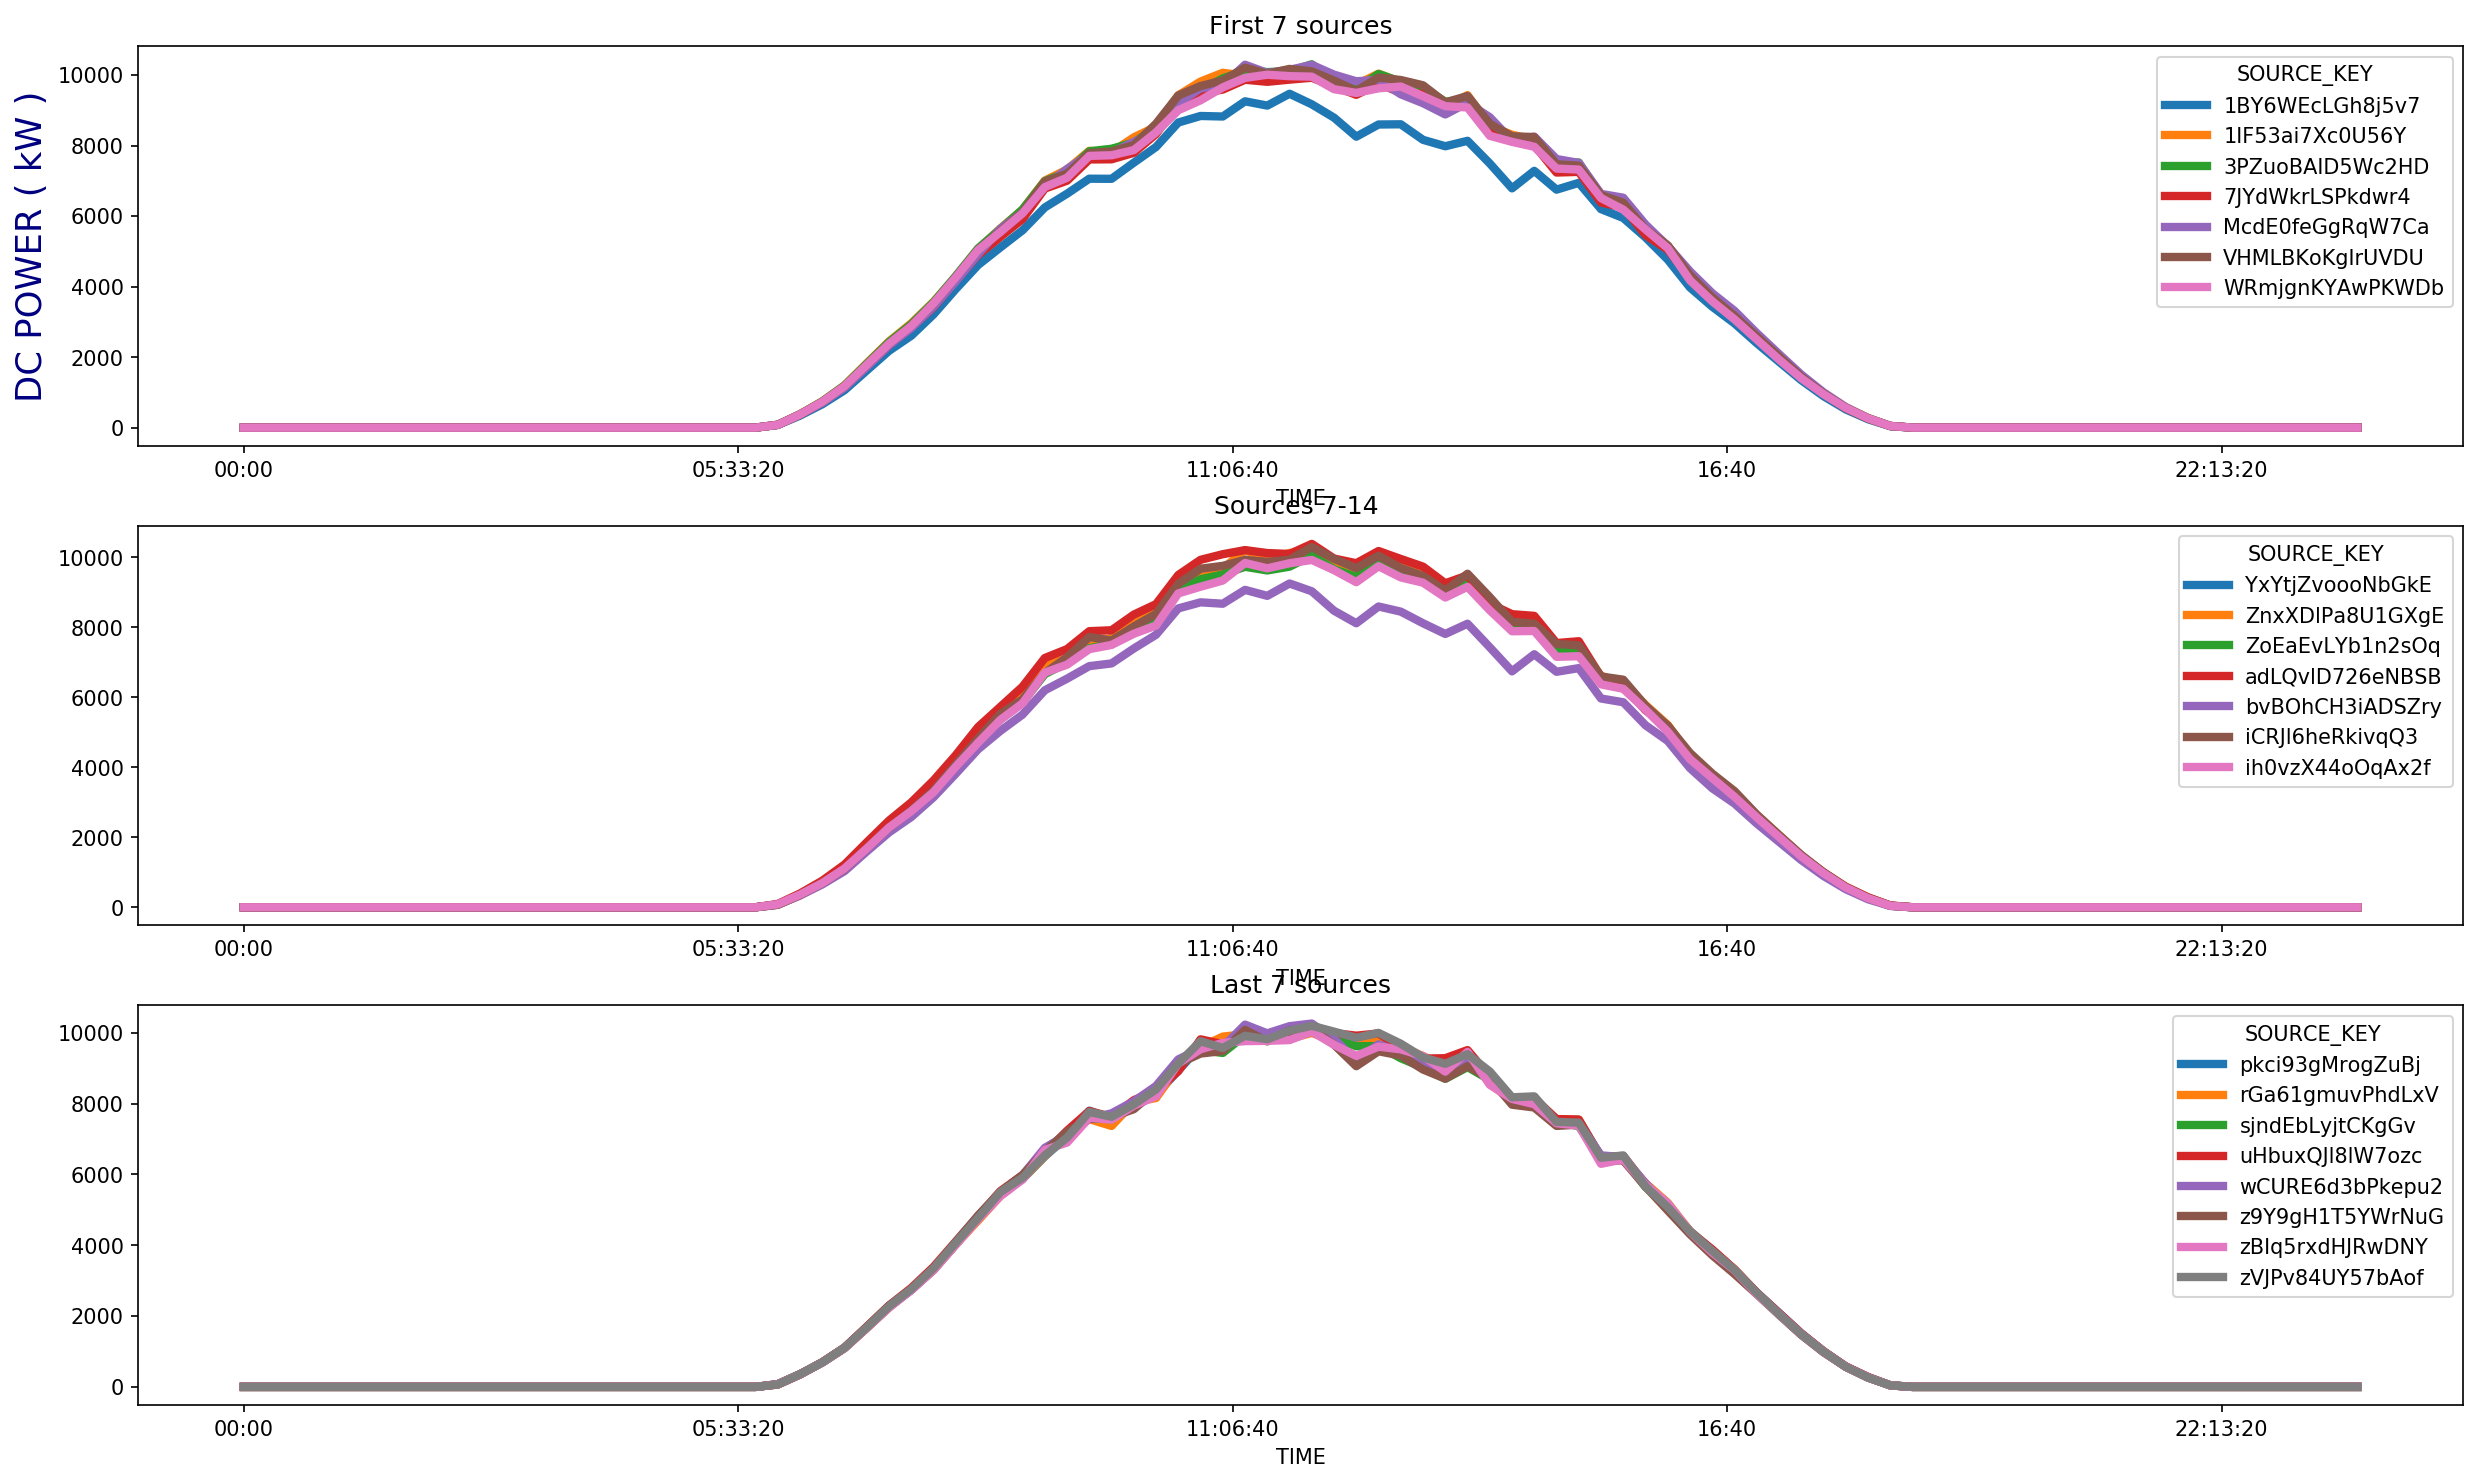

In [32]:
dc_gen1=generation1.copy()
dc_gen1['TIME']=dc_gen1['DATE_TIME'].dt.time
dc_gen1=dc_gen1.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette(n_colors=12)

fig,ax=plt.subplots(ncols=1,nrows=3,dpi=150,figsize=(20,12))
dc_gen1.iloc[:,0:7].plot(ax=ax[0],color=cmap,linewidth=4)
dc_gen1.iloc[:,7:14].plot(ax=ax[1],color=cmap,linewidth=4)
dc_gen1.iloc[:,14:22].plot(ax=ax[2],color=cmap,linewidth=4)

ax[0].set_title('First 7 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Sources 7-14 ')
ax[2].set_title('Last 7 sources')
plt.show()

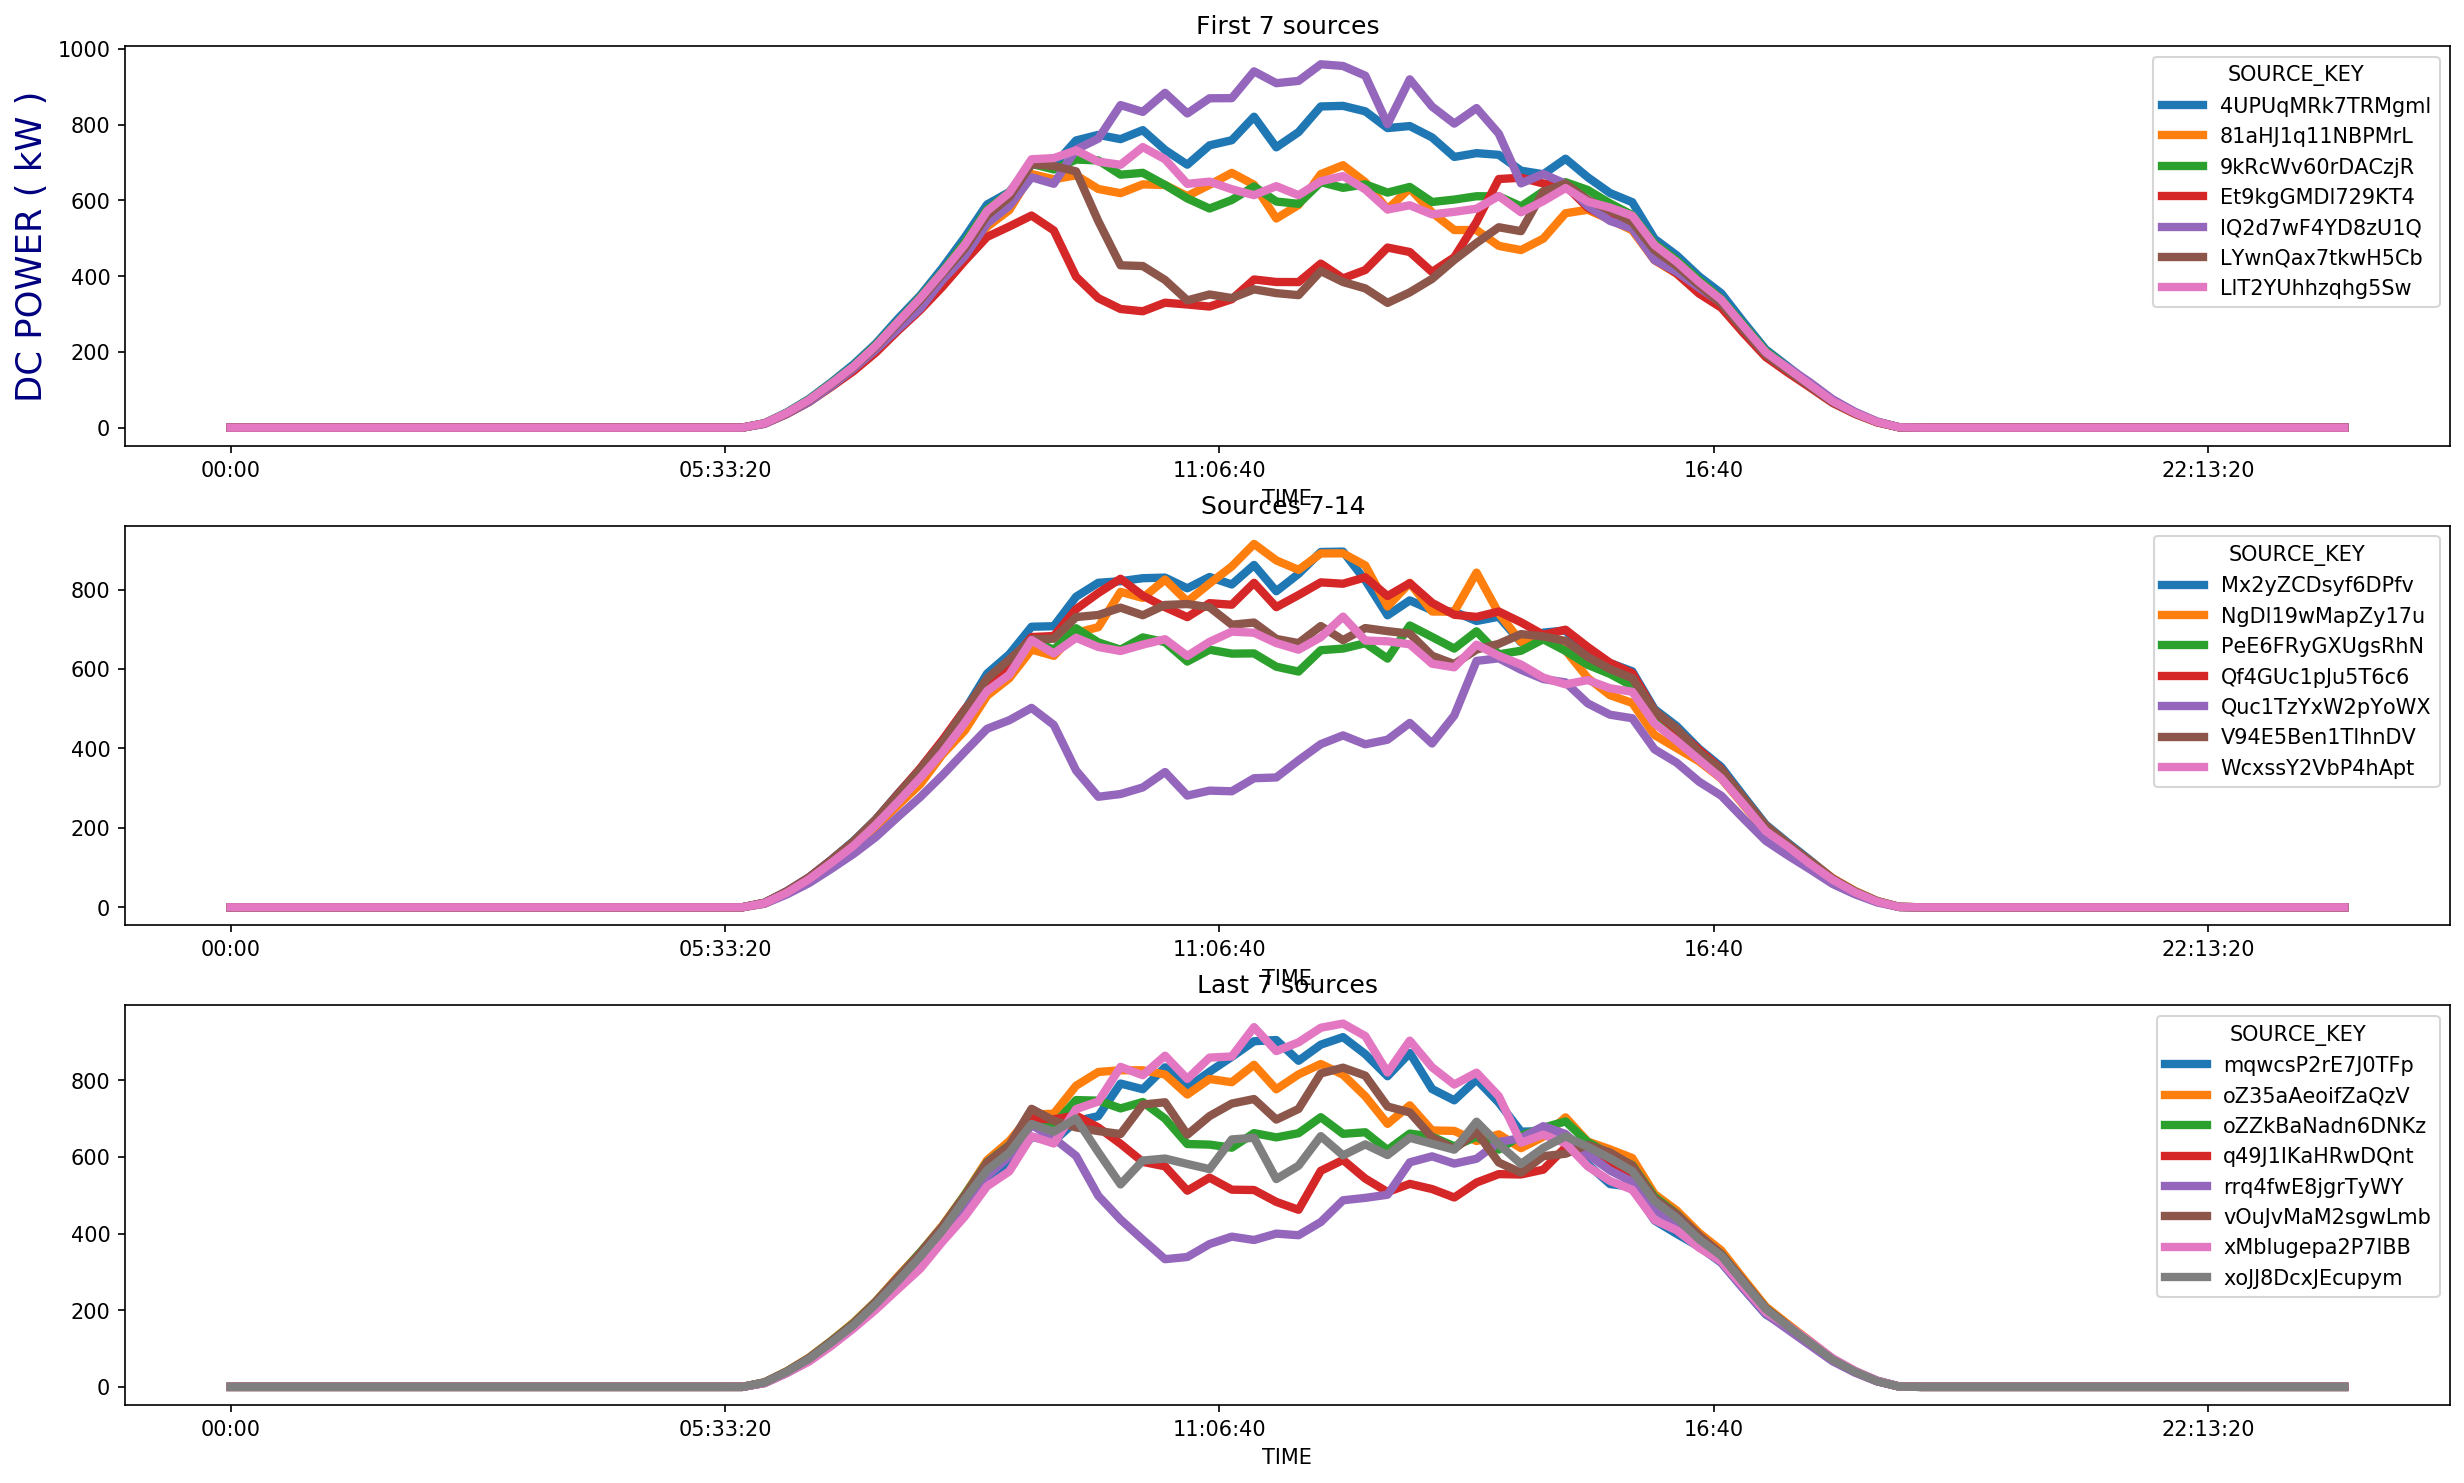

In [31]:
dc_gen2=generation2.copy()
dc_gen2['TIME']=dc_gen2['DATE_TIME'].dt.time
dc_gen2=dc_gen2.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette(n_colors=12)

fig,ax=plt.subplots(ncols=1,nrows=3,dpi=150,figsize=(20,12))
dc_gen2.iloc[:,0:7].plot(ax=ax[0],color=cmap, linewidth=4)
dc_gen2.iloc[:,7:14].plot(ax=ax[1],color=cmap, linewidth=4)
dc_gen2.iloc[:,14:22].plot(ax=ax[2],color=cmap, linewidth=4)

ax[0].set_title('First 7 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Sources 7-14 ')
ax[2].set_title('Last 7 sources')
plt.show()

In [225]:
def conv_rate(data):
    tmp = data.sum()
    return round(tmp['AC_POWER'] / tmp['DC_POWER'] * 100, 2)

In [245]:
print("Conversion rate of DC to AC")
print(f"{conv_rate(generation1)}% : Plant1")
print(f"{conv_rate(generation2)}% : Plant2")

tmp = generation1.copy()


Conversion rate of DC to AC
9.78% : Plant1
97.8% : Plant2


Huge difference in the values of conversion. I have 2 ideas in my head:
1. Because the difference is 10X, there can be problem with collection of data or
2. If the data is correct, Then it means Plant 1's inverters need cleaning or maintenance (even change can be needed). 

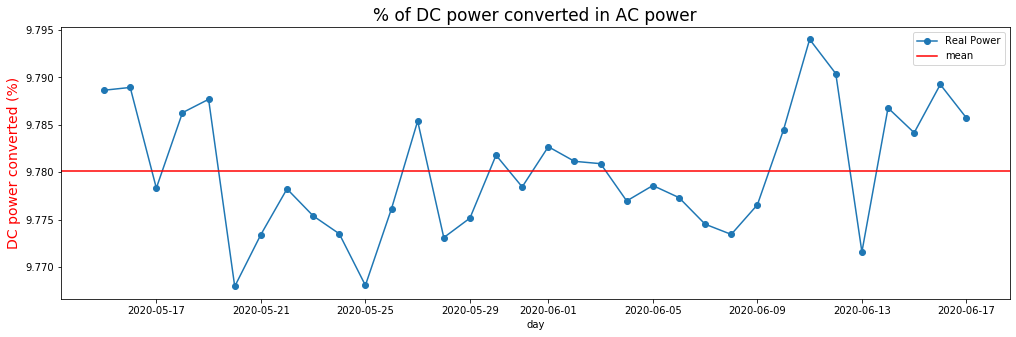

In [306]:
gencopy1=generation1.copy()
gencopy1['day']=gencopy1['DATE_TIME'].dt.date
gencopy1=gencopy1.groupby('day').sum()
gencopy1['conversion1']=gencopy1['AC_POWER']/gencopy1['DC_POWER']*100

gencopy1['conversion1'].plot(style='o-',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(gencopy1['conversion1'].mean(),linestyle='-',color='red',label='mean')
plt.legend()
plt.show()

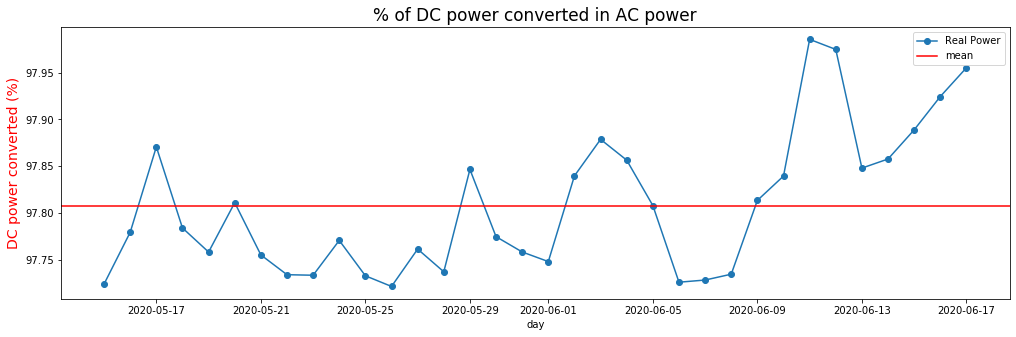

In [307]:
gencopy2=generation2.copy()
gencopy2['day']=gencopy2['DATE_TIME'].dt.date
gencopy2=gencopy2.groupby('day').sum()
gencopy2['conversion2']=gencopy2['AC_POWER']/gencopy2['DC_POWER']*100


gencopy2['conversion2'].plot(style='o-',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(gencopy2['conversion2'].mean(),linestyle='-',color='red',label='mean')
plt.legend()
plt.show()

We have serious problems on Plant 1 (generation1 as data) so, we will do forecasting with second plant (generation2).

# Let's merge the data for more insights and Regression analysis 

In [9]:
#Preparing the data

In [12]:
generation1_dt= generation1.groupby(['DATE_TIME'], as_index=False).sum()
generation1_dt  #Summing up all inverter records by DATE_TIME

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...
3153,2020-06-17 22:45:00,0.0,0.0,129571.000000,156142755.0
3154,2020-06-17 23:00:00,0.0,0.0,129571.000000,156142755.0
3155,2020-06-17 23:15:00,0.0,0.0,129571.000000,156142755.0
3156,2020-06-17 23:30:00,0.0,0.0,129571.000000,156142755.0


In [13]:
generation1_dt_select = generation1_dt[['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD']]
generation1_dt_select.head(3)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0


In [16]:
sensor1_drop = sensor1.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1) #relevant data from weather sensor
sensor1_drop.head(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0


In [20]:
sensor1_drop['DATE_TIME'] = pd.to_datetime(sensor1_drop['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [21]:
merged_data = pd.merge(generation1_dt_select, sensor1_drop, how='inner', on = 'DATE_TIME')

In [22]:
merged_data.iloc[50:55]

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
50,2020-05-15 12:30:00,197884.500010,19341.707142,69163.071429,32.147685,52.353255,0.649248
51,2020-05-15 12:45:00,209419.238093,20470.897620,73879.196429,32.391420,50.631240,0.761243
52,2020-05-15 13:00:00,129842.357143,12721.876786,77961.321428,32.622796,49.610768,0.416035
53,2020-05-15 13:15:00,149740.553574,14665.985714,81491.803572,32.497064,47.011161,0.489244
54,2020-05-15 13:30:00,175573.464286,17185.658928,85448.928572,32.524621,46.669863,0.574561


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


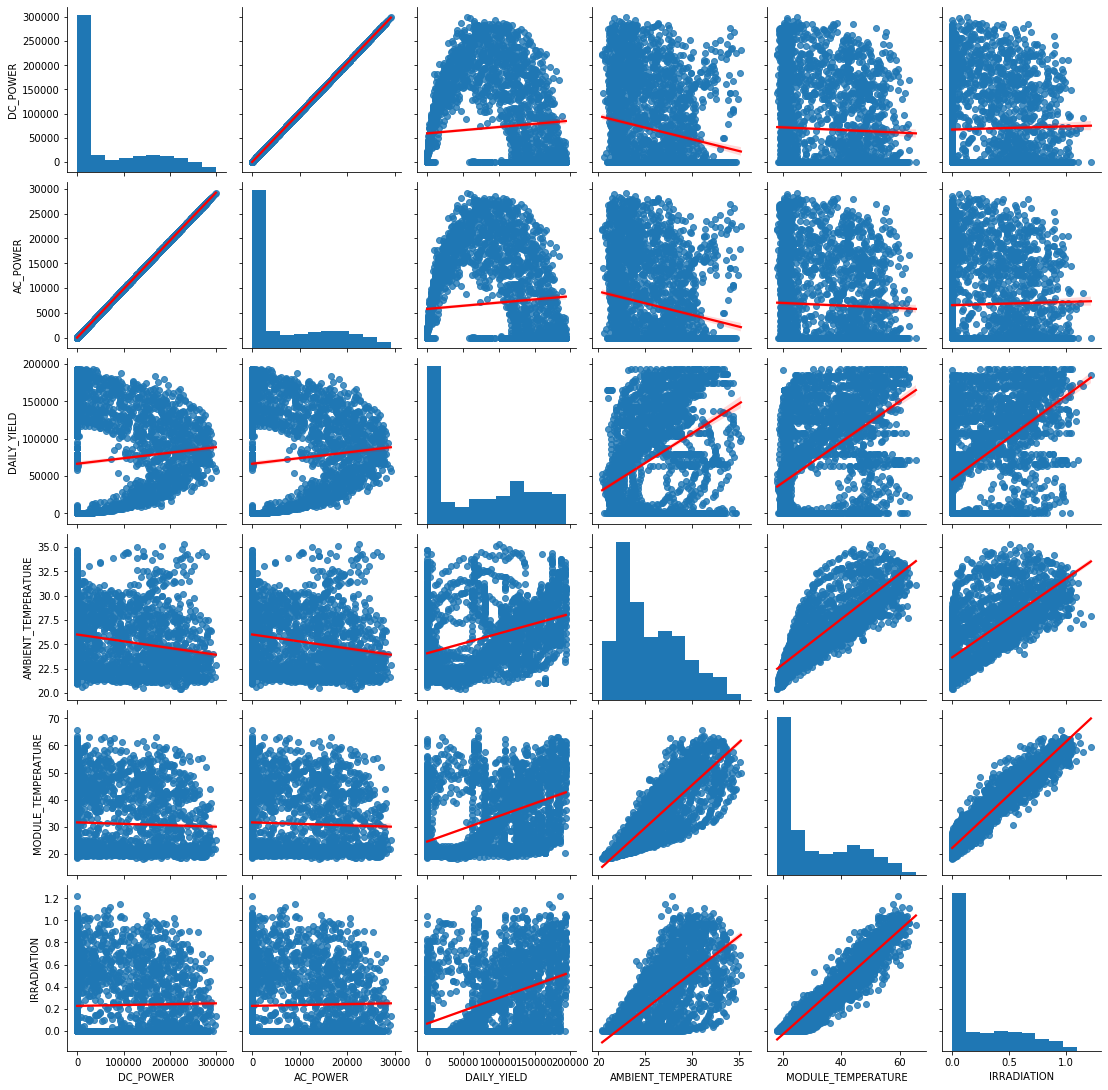

In [23]:
g = sns.pairplot(merged_data, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [23]:
generation2_dt= generation2.groupby(['DATE_TIME'], as_index=False).sum()
generation2_dt  #Summing up all inverter records by DATE_TIME

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,90992022,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,90992022,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,90992022,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,90992022,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,90992022,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,90992022,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,90992022,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,90992022,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,90992022,0.0,0.0,93040.000000,1.419408e+10


In [24]:
#Taking relevant data (We dont need columns like ID,Total Yield)
generation2_dt_select = generation2_dt[['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD']]
generation2_dt_select.head(3)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095
1,2020-05-15 00:15:00,0.0,0.0,28401.000000
2,2020-05-15 00:30:00,0.0,0.0,28401.000000


In [25]:
sensor2_drop = sensor2.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1) #relevant data from weather sensor
sensor2_drop.head(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0


In [26]:
sensor2_drop['DATE_TIME'] = pd.to_datetime(sensor2_drop['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [27]:
merged_data = pd.merge(generation2_dt_select, sensor2_drop, how='inner', on = 'DATE_TIME')

In [28]:
merged_data.iloc[50:55]

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
50,2020-05-15 12:30:00,17661.648571,17220.086190,89946.319048,35.966358,58.888153,0.956238
51,2020-05-15 12:45:00,17586.326667,17147.060000,94303.733333,35.992946,57.729486,0.979090
52,2020-05-15 13:00:00,17838.133333,17397.133333,98452.200000,36.458581,60.389377,0.926438
53,2020-05-15 13:15:00,17768.745714,17331.822381,102696.790476,36.939564,56.859504,0.904247
54,2020-05-15 13:30:00,18686.087619,18226.817143,107390.357143,36.890793,57.148673,0.895474


Visualization for some insights

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


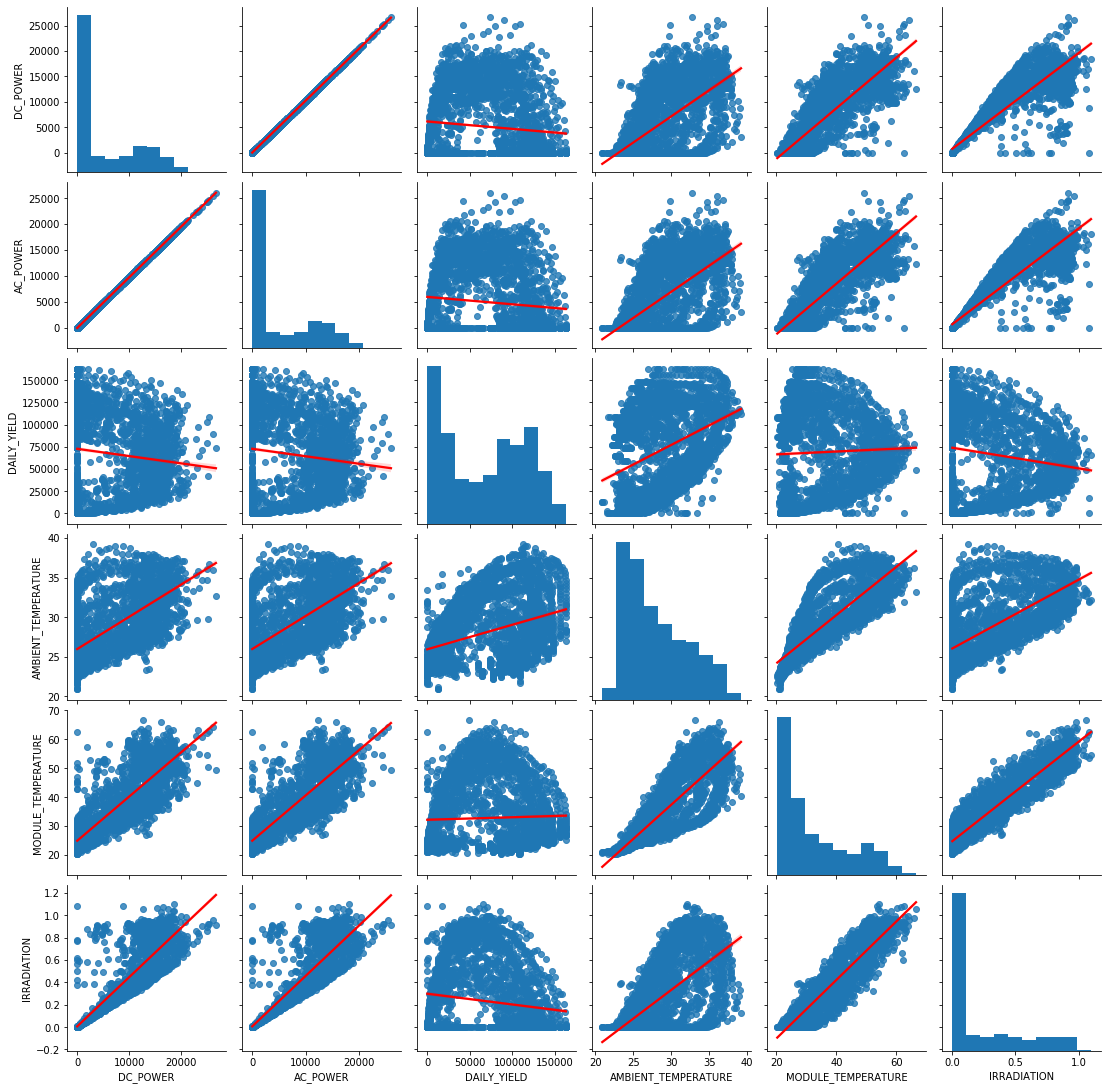

In [29]:

g = sns.pairplot(merged_data, kind="reg", plot_kws={'line_kws':{'color':'red'}})

# Forecasting next days

First of all, we will try to predict AC POWER using regression technique.
As we seen in the visualizations part there is strong correlation between AC Power and Irradiation and between AC power and Temperature

In [38]:
from sklearn import datasets, linear_model   #libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
data_reg = merged_data[['AC_POWER','IRRADIATION','AMBIENT_TEMPERATURE']] 

In [40]:
y= data_reg['AC_POWER']
X=data_reg[['IRRADIATION','AMBIENT_TEMPERATURE']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [58]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2281, 2) (2281,)
(978, 2) (978,)


In [59]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
pred_y_train = lm.predict(X_train)
pred_y_test = lm.predict(X_test)


In [60]:
#Model Evaluation on Training data

R2_train = r2_score(y_train, pred_y_train)
mse_train = mean_squared_error(y_train, pred_y_train)
print('R2 for Train dataset:', R2_train, '  '   'MSE for Train dataset:', mse_train)

R2 for Train dataset: 0.8325011385290593   MSE for Train dataset: 6885960.86199786


In [64]:
#Model Evaluation on Testing data

R2_test = r2_score(y_test, pred_y_test)
mse_test = mean_squared_error(y_test, pred_y_test)
print('R2 for Test dataset:', R2_test, '  '   'MSE for Test dataset:', mse_test)

R2 for Test dataset: 0.8331420997408432   MSE for Test dataset: 6165288.928054745


R square values of Train and Test datasets are almost equal. Model can be considered valid and apprx of 83.3% AC POWER variation is explained in terms of Irradiation and Temperature. 

In [65]:
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)

Slope: [17446.42098877   124.36434076]
Intercept: -2519.031922579954


Results indicate that with 1 unit increase in Irradiation, AC Power output increases by approx 17.5MW With 1 degree increase in Ambient Temperature AC Power output increases by 124 kW.

First starting with total in a daily basis. This model will analyze the total yield 

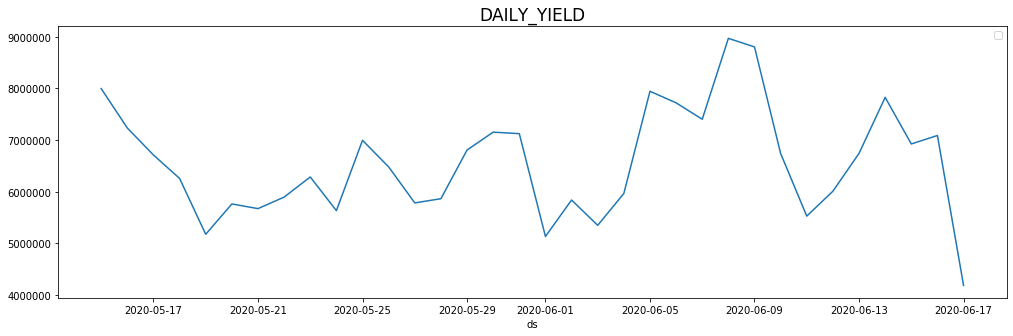

In [308]:
from fbprophet import Prophet
pred_gen2=generation2.copy()
pred_gen2=pred_gen2.groupby('DATE')['DAILY_YIELD'].sum().reset_index()
pred_gen2.rename(columns={'DATE':'ds','DAILY_YIELD':'y'},inplace=True)
pred_gen2.plot(x='ds',y='y',figsize=(17,5))
plt.legend('')
plt.title('DAILY_YIELD',size=17)
plt.show()

For forecasting, Facebook's open source library 'fbprophet' is used. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

In [34]:
df = generation2.copy()  
df.rename(columns= {'DATE_TIME':'ds', 'DAILY_YIELD': 'y'}, inplace = True)
m = Prophet(daily_seasonality=True, weekly_seasonality = True, yearly_seasonality = False)
m.fit(df)
future = m.make_future_dataframe(periods=8)
forecast = m.predict(future)

The input to Prophet is always a dataframe with two columns: ds and y . The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

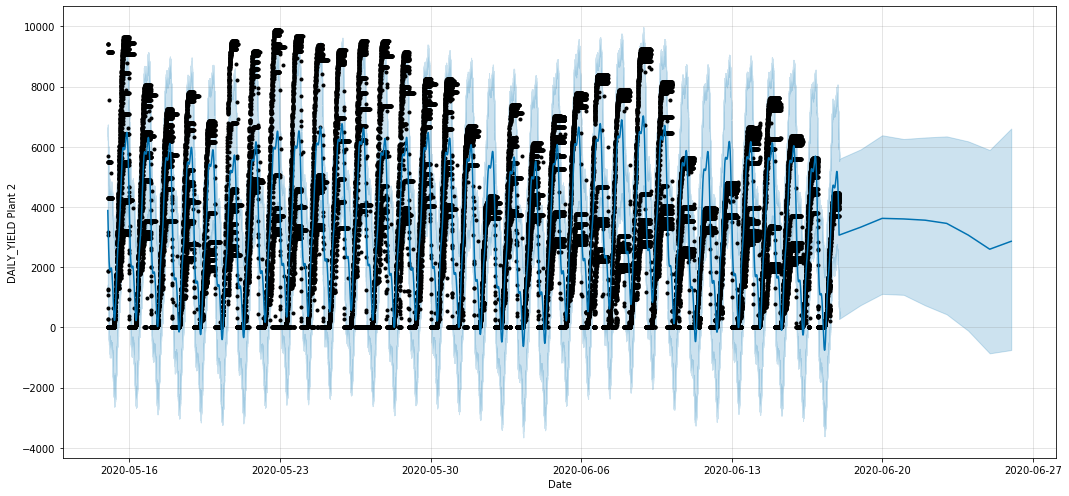

In [35]:
fig1 = m.plot(forecast, xlabel='Date', ylabel='DAILY_YIELD Plant 2',figsize = (15,7))
ax = fig.gca()
ax.set_title("DAILY_YIELD Forecast", size=34)
ax.set_xlabel("X", size=34)
ax.set_ylabel("Y", size=34)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

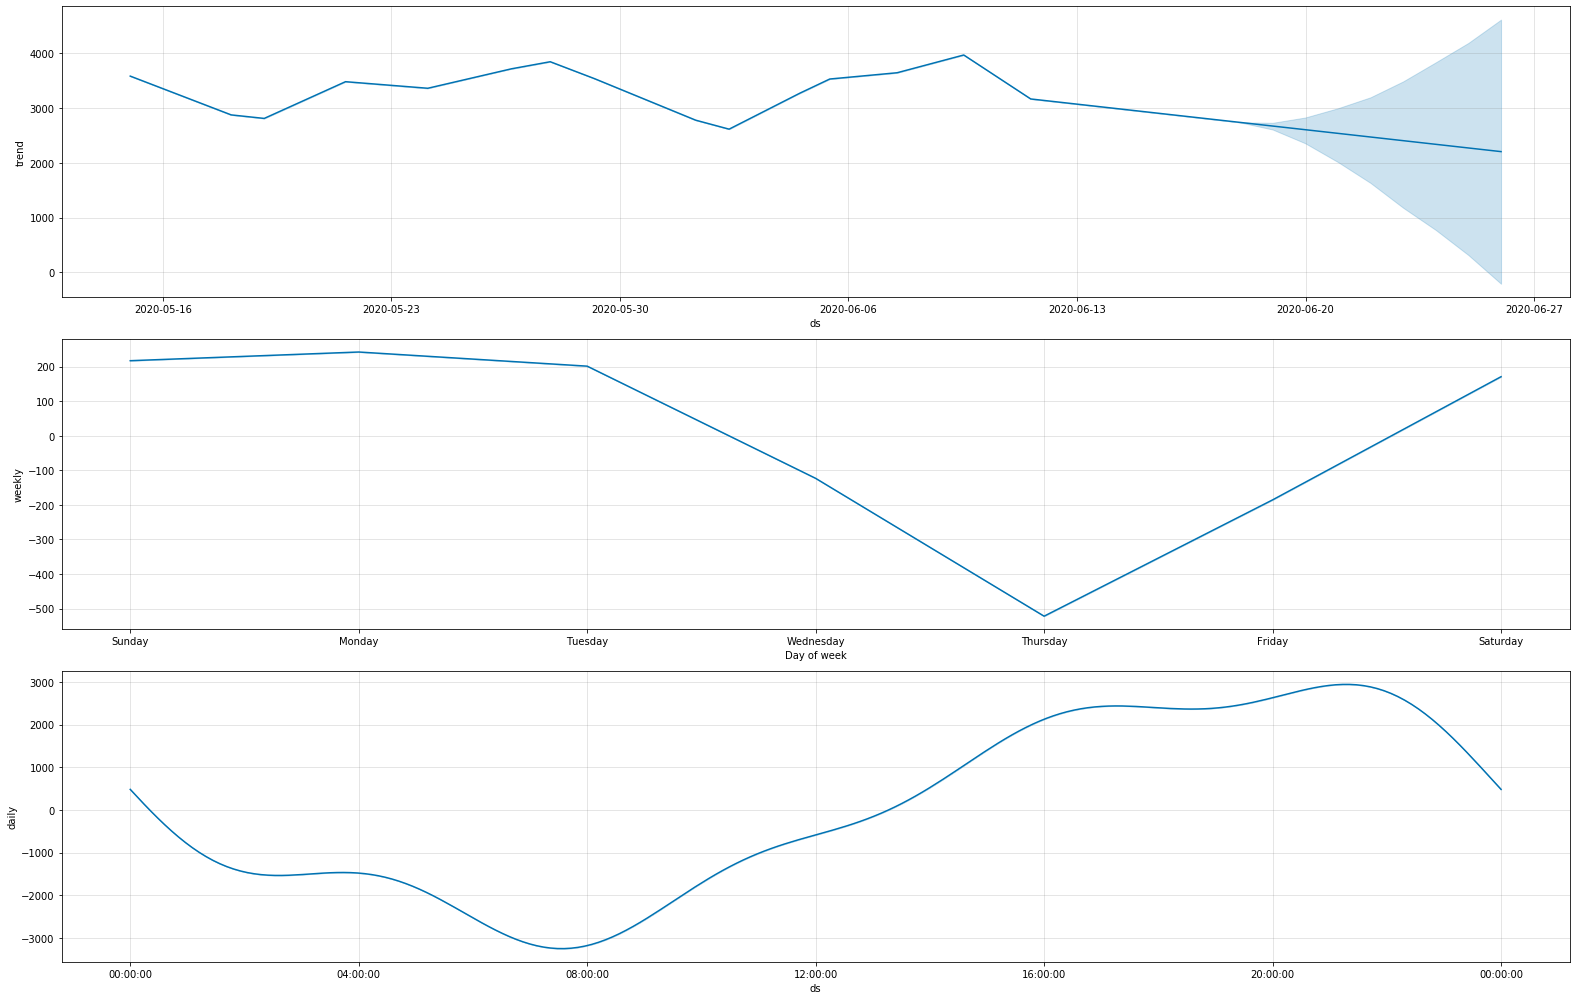

In [36]:
fig2 = m.plot_components(forecast, figsize = (22,14))

Graph 1 -> First forecasted day is 2020-06-18 which is Thursday, we see dips in Thursday and slight increase in Friday.
Graph 3 -> As expected daily yield increases from 7am and it starts to decrease 10 am (it's summer season) 

## 2nd way

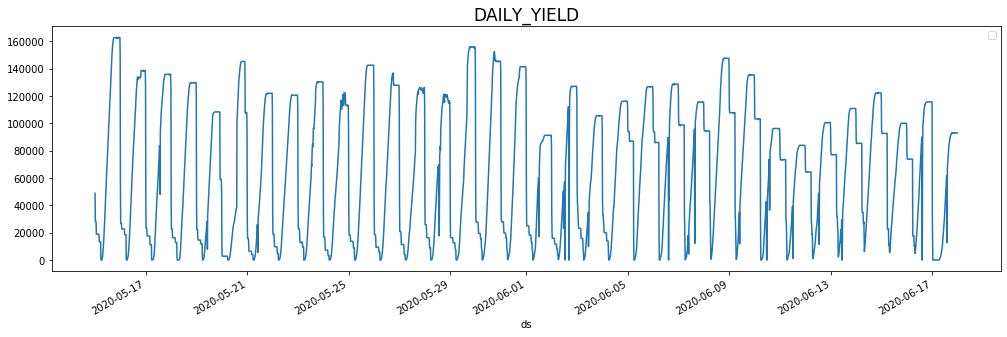

In [37]:
pred_gen2_2=generation2.copy()
pred_gen2_2=pred_gen2_2.groupby('DATE_TIME')['DAILY_YIELD'].sum().reset_index()
pred_gen2_2.rename(columns={'DATE_TIME':'ds','DAILY_YIELD':'y'},inplace=True)
pred_gen2_2.plot(x='ds',y='y',figsize=(17,5))
plt.legend('')
plt.title('DAILY_YIELD',size=17)
plt.show()

Initializing the model

In [38]:
n = Prophet()
n.fit(pred_gen2_2)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [39]:
from pandas.tseries.offsets import DateOffset
future = [pred_gen2_2['ds'].iloc[-1:] + DateOffset(minutes=x) for x in range(0,2910,15) ]
time1=pd.DataFrame(future).reset_index().drop('index',1)
time1.rename(columns={3258:'ds'},inplace=True)
time1

,ds
0,2020-06-17 23:45:00
1,2020-06-18 00:00:00
2,2020-06-18 00:15:00
3,2020-06-18 00:30:00
4,2020-06-18 00:45:00
...,...
189,2020-06-19 23:00:00
190,2020-06-19 23:15:00
191,2020-06-19 23:30:00
192,2020-06-19 23:45:00


In [40]:
timeline=pd.DataFrame(pred_gen2_2['ds'])
fut=timeline.append(time1,ignore_index=True)
fut.tail()


,ds
3448,2020-06-19 23:00:00
3449,2020-06-19 23:15:00
3450,2020-06-19 23:30:00
3451,2020-06-19 23:45:00
3452,2020-06-20 00:00:00


In [41]:
forecast1 = n.predict(fut)

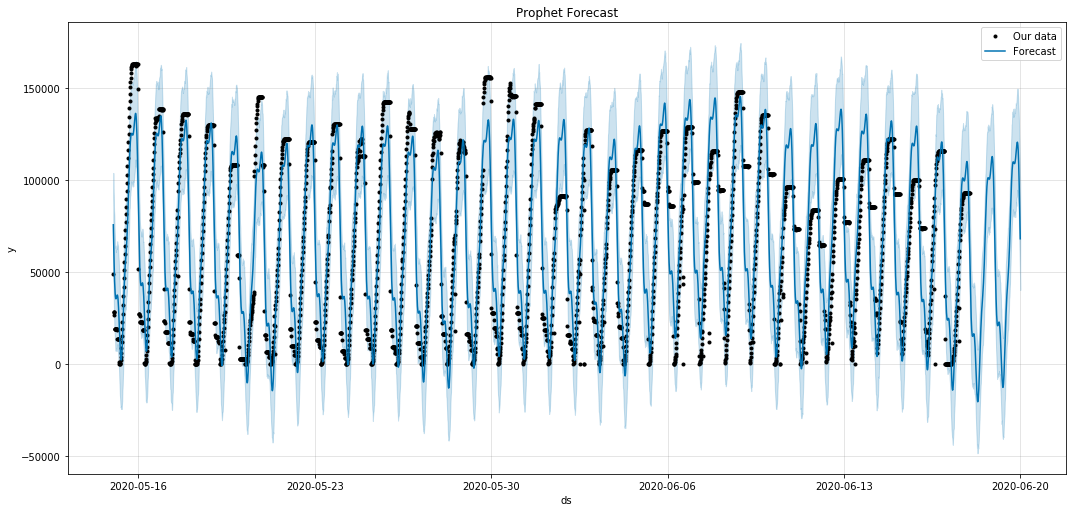

In [42]:
n.plot(forecast1,figsize=(15,7))
plt.title('ok')
plt.legend(labels=['Our data','Forecast'])
plt.title('Prophet Forecast')
plt.show()

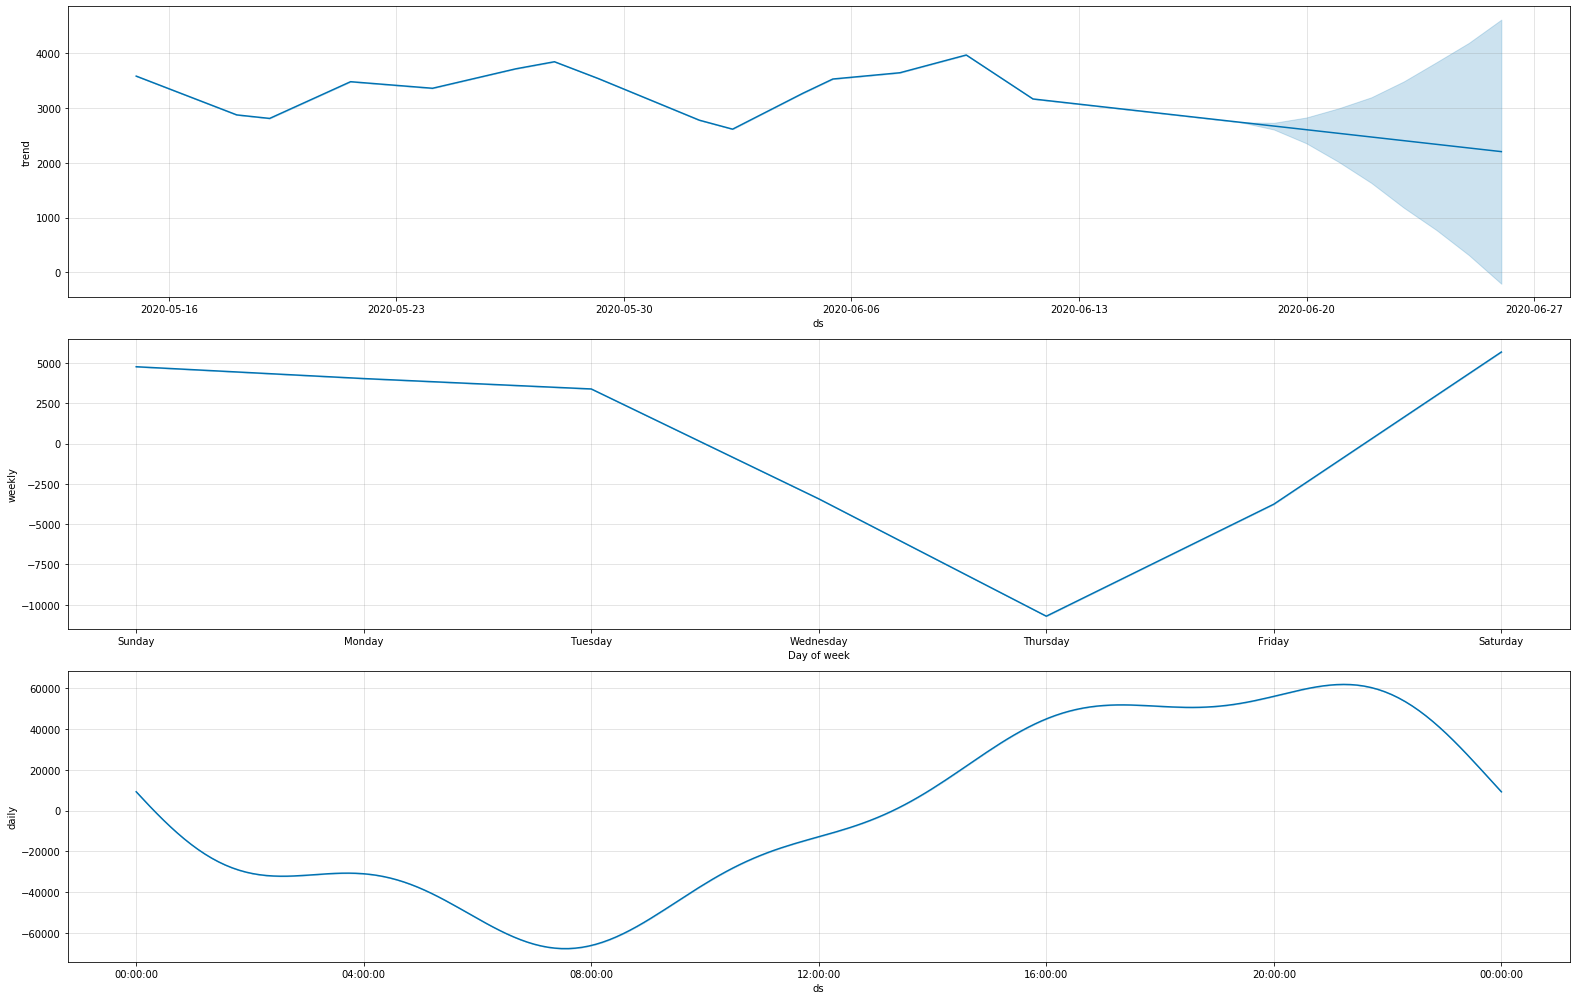

In [43]:
fig3 = n.plot_components(forecast, figsize = (22,14))

References:
1) https://towardsdatascience.com/anomaly-detection-time-series-4c661f6f165f
2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
3)https://www.researchgate.net/post/Is-there-an-ideal-ratio-between-a-training-set-and-validation-set-Which-trade-off-would-you-suggest
4) https://pypi.org/project/fbprophet/